<a href="https://colab.research.google.com/github/hodades/Prediction-des-Frais-Medicaux-pour-une-Assurance-Sante/blob/main/Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Charger et examiner les données

In [18]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [19]:
import pandas as pd

# Charger les données dans un DataFrame
df = pd.read_csv("../content/insurance.csv")

In [20]:
# Examiner les dimensions du DataFrame
print("Shape:", df.shape)

Shape: (1338, 7)


In [21]:
# Examiner les colonnes du DataFrame
print("Colonnes:", df.columns)


Colonnes: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')


In [22]:
# Informations de base sur le DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [23]:
# Afficher les 5 premières lignes
df.head(5).T

,0,1,2,3,4
age,19,18,28,33,32
sex,female,male,male,male,male
bmi,27.9,33.8,33.0,22.7,28.9
children,0,1,3,0,0
smoker,yes,no,no,no,no
region,southwest,southeast,southeast,northwest,northwest
expenses,16884.92,1725.55,4449.46,21984.47,3866.86


# 2. Vérification des valeurs manquantes

In [24]:
# Vérifier les valeurs manquantes
print("Valeurs manquantes par colonne:")
print(df.isna().sum())

Valeurs manquantes par colonne:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


# 3. Encodage des variables catégoriques

In [25]:
df = pd.get_dummies(df, drop_first=True)

In [26]:
df.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,False,True,False,False,True
1,18,33.8,1,1725.55,True,False,False,True,False
2,28,33.0,3,4449.46,True,False,False,True,False
3,33,22.7,0,21984.47,True,False,True,False,False
4,32,28.9,0,3866.86,True,False,True,False,False


# 4. Séparation des caractéristiques et de la cible

In [27]:
X = df.drop('expenses', axis=1)
y = df['expenses']

# 5. Division du dataset en ensembles d'entraîment et de test

In [28]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

#6. Standardisation des variables continues


In [29]:
scaler = StandardScaler()
train_X[['age', 'bmi', 'children']] = scaler.fit_transform(train_X[['age', 'bmi', 'children']])
test_X[['age', 'bmi', 'children']] = scaler.transform(test_X[['age', 'bmi', 'children']])

#7. Entraînement des différents modèles de régression

In [34]:
# Entraînement des différents modèles de régression
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "KNN Regressor": KNeighborsRegressor(),
    "SVR": SVR()
}

results = {}

In [35]:

# Entraînement et évaluation des modèles
for name, model in models.items():
    model.fit(train_X, train_y)
    predictions = model.predict(test_X)
    mse = mean_squared_error(test_y, predictions)
    mae = mean_absolute_error(test_y, predictions)
    r2 = r2_score(test_y, predictions)
    results[name] = {"MSE": mse, "MAE": mae, "R2 Score": r2}

In [36]:
# Affichage des résultats des différents modèles
for model, metrics in results.items():
    print(f"Modèle : {model}")
    print(f"MSE : {metrics['MSE']}")
    print(f"MAE : {metrics['MAE']}")
    print(f"R² Score : {metrics['R2 Score']}")
    print("============================")


Modèle : Linear Regression
MSE : 33600065.35507784
MAE : 4181.561524000794
R² Score : 0.7835726930039905
Modèle : Decision Tree Regressor
MSE : 42316664.419873506
MAE : 3145.8914552238803
R² Score : 0.7274266694227429
Modèle : Random Forest Regressor
MSE : 20902239.06838268
MAE : 2556.0849396108747
R² Score : 0.8653629014125361
Modèle : KNN Regressor
MSE : 46767335.90990476
MAE : 3886.1295746268656
R² Score : 0.698758664324181
Modèle : SVR
MSE : 166348184.9590521
MAE : 8606.598293578672
R² Score : -0.07149463293888703


Parmi les modèles testés :

1. Le modèle de **Random Forest Regressor** est le plus performant avec un MSE bas (20902239) et un R² élevé (0.865).
2. Le modèle de **Support Vector Regressor (SVR)** est le moins performant avec un MSE élevé (166348184) et un R² négatif (-0.071).
3. **Linear Regression** et **Decision Tree** obtiennent des résultats intermédiaires, mais Random Forest reste supérieur en précision.

In [37]:
# Analyse des coefficients pour la régression linéaire
lin_reg = models["Linear Regression"]
coefficients = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
print("Coefficients de la Régression Linéaire :")
print(coefficients)

Coefficients de la Régression Linéaire :
                   Coefficient
age                3614.697633
bmi                2037.268555
children            517.330947
sex_male            -18.519741
smoker_yes        23650.312302
region_northwest   -370.313511
region_southeast   -658.712382
region_southwest   -809.229878


L'analyse des coefficients montre :

1. **smoker_yes** a le coefficient le plus élevé (23650), indiquant une forte influence sur la variable cible.
2. **age** (3614) et **bmi** (2037) ont également un impact significatif, mais moindre comparé au statut de fumeur.
3. Les régions géographiques ont des coefficients négatifs, suggérant une légère réduction de la valeur cible dans ces zones.

In [38]:
# Importance des caractéristiques pour Random Forest et Decision Tree
rf_reg = models["Random Forest Regressor"]
dt_reg = models["Decision Tree Regressor"]

feature_importance_rf = pd.Series(rf_reg.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance_dt = pd.Series(dt_reg.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Importance des caractéristiques - Random Forest :")
print(feature_importance_rf)

print("Importance des caractéristiques - Decision Tree :")
print(feature_importance_dt)

Importance des caractéristiques - Random Forest :
smoker_yes          0.608618
bmi                 0.215477
age                 0.134849
children            0.019668
sex_male            0.006347
region_southeast    0.005536
region_northwest    0.005381
region_southwest    0.004125
dtype: float64
Importance des caractéristiques - Decision Tree :
smoker_yes          0.609529
bmi                 0.207060
age                 0.139249
children            0.017195
region_northwest    0.009947
region_southeast    0.007385
sex_male            0.006414
region_southwest    0.003222
dtype: float64


L'analyse de l'importance des caractéristiques pour les modèles Random Forest et Decision Tree montre :

1. **smoker_yes** est la caractéristique la plus influente dans les deux modèles, avec une importance autour de 0.60, indiquant un impact majeur sur la prédiction.
2. **bmi** et **age** suivent en termes d'importance, bien que leur impact soit nettement inférieur à celui de fumeur.
3. Les variables géographiques et **sex_male** ont une importance très faible, indiquant un effet négligeable sur la prédiction finale dans ces modèles.

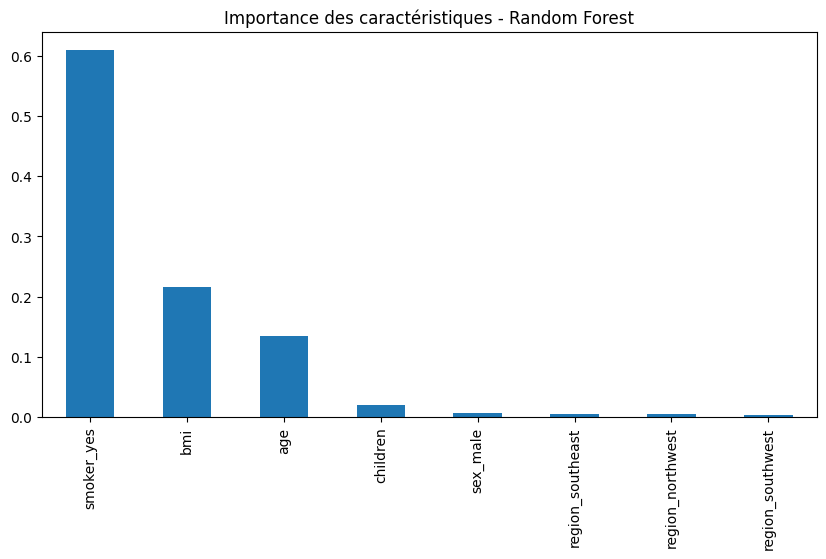

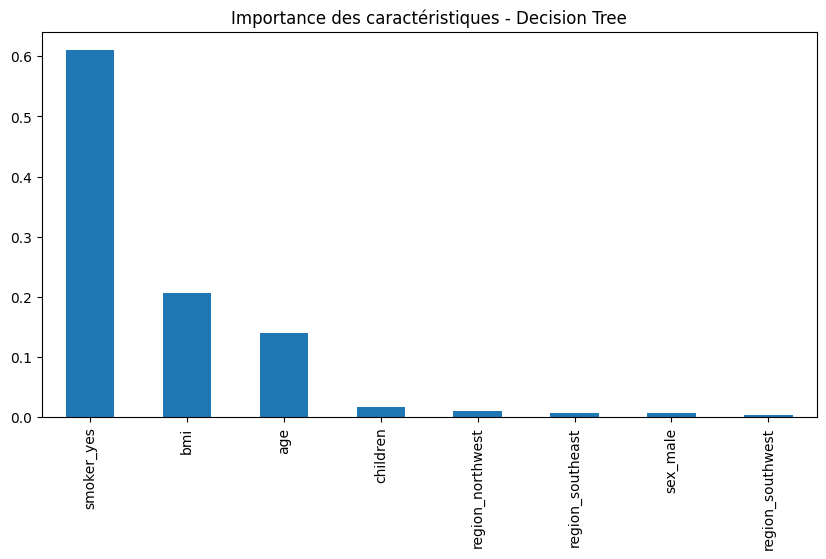

In [40]:
# Visualisation des caractéristiques influentes
plt.figure(figsize=(10, 5))
plt.title("Importance des caractéristiques - Random Forest")
feature_importance_rf.plot(kind='bar')
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Importance des caractéristiques - Decision Tree")
feature_importance_dt.plot(kind='bar')
plt.show()


In [41]:
print("Analyse des Coefficients pour la Régression Linéaire :")
print(coefficients.sort_values(by='Coefficient', ascending=False))


Analyse des Coefficients pour la Régression Linéaire :
                   Coefficient
smoker_yes        23650.312302
age                3614.697633
bmi                2037.268555
children            517.330947
sex_male            -18.519741
region_northwest   -370.313511
region_southeast   -658.712382
region_southwest   -809.229878


In [42]:
print("Importance des Caractéristiques - Random Forest :")
print(feature_importance_rf)

print("Importance des Caractéristiques - Decision Tree :")
print(feature_importance_dt)


Importance des Caractéristiques - Random Forest :
smoker_yes          0.608618
bmi                 0.215477
age                 0.134849
children            0.019668
sex_male            0.006347
region_southeast    0.005536
region_northwest    0.005381
region_southwest    0.004125
dtype: float64
Importance des Caractéristiques - Decision Tree :
smoker_yes          0.609529
bmi                 0.207060
age                 0.139249
children            0.017195
region_northwest    0.009947
region_southeast    0.007385
sex_male            0.006414
region_southwest    0.003222
dtype: float64


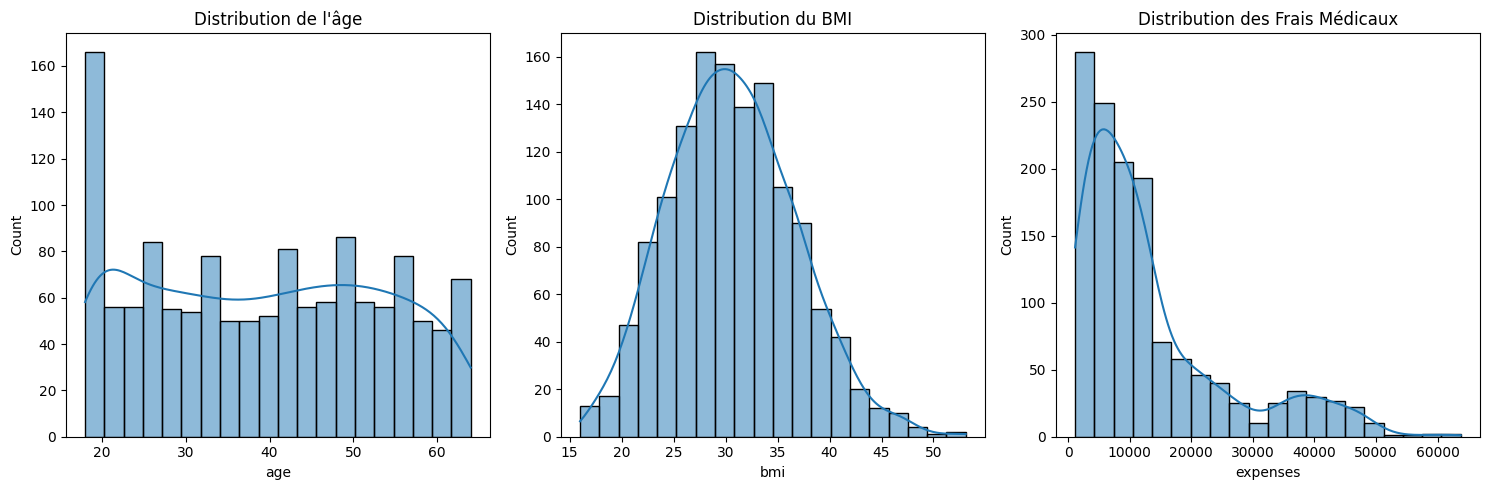

In [43]:
# Distribution de l'âge, du BMI, et des frais médicaux
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['age'], kde=True, bins=20)
plt.title("Distribution de l'âge")

plt.subplot(1, 3, 2)
sns.histplot(df['bmi'], kde=True, bins=20)
plt.title("Distribution du BMI")

plt.subplot(1, 3, 3)
sns.histplot(df['expenses'], kde=True, bins=20)
plt.title("Distribution des Frais Médicaux")

plt.tight_layout()
plt.show()


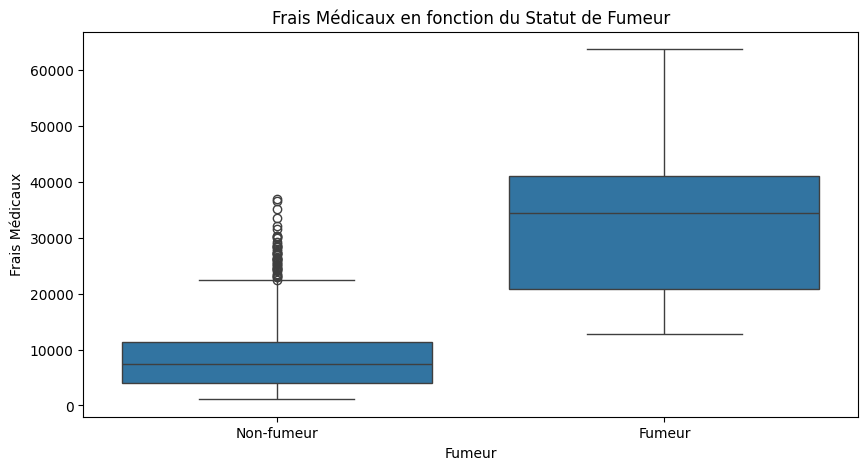

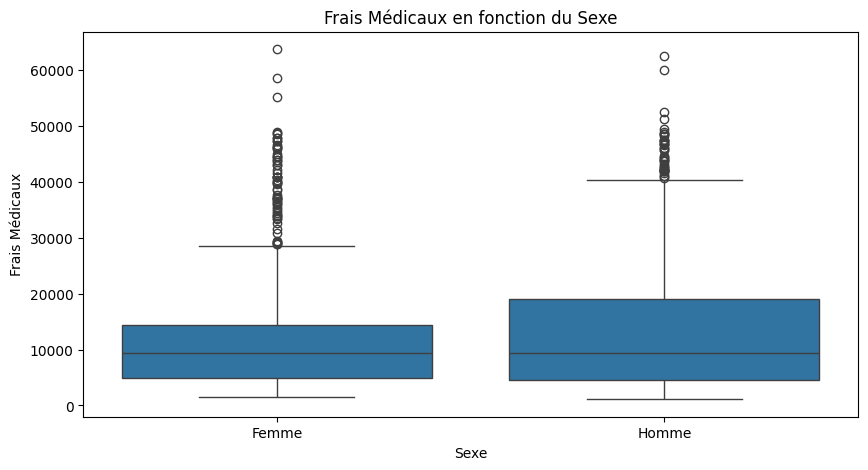

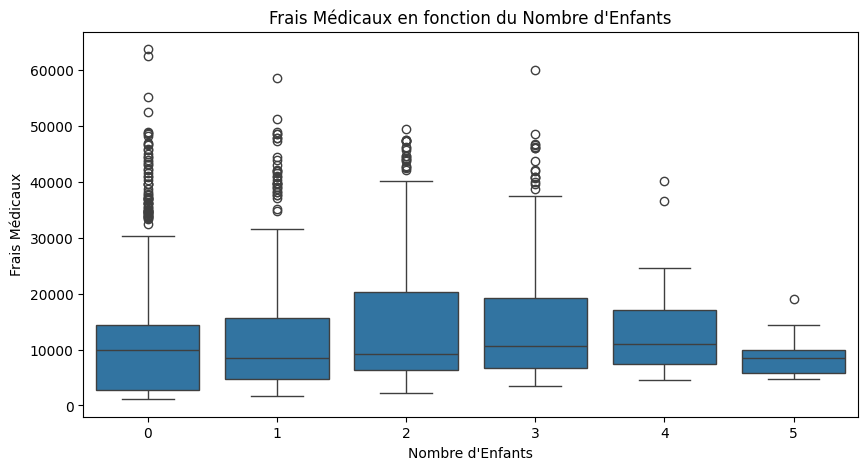

In [44]:
# Frais médicaux en fonction du statut de fumeur
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='smoker_yes', y='expenses')
plt.title("Frais Médicaux en fonction du Statut de Fumeur")
plt.xlabel("Fumeur")
plt.ylabel("Frais Médicaux")
plt.xticks([0, 1], ['Non-fumeur', 'Fumeur'])
plt.show()

# Frais médicaux en fonction du sexe
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='sex_male', y='expenses')
plt.title("Frais Médicaux en fonction du Sexe")
plt.xlabel("Sexe")
plt.ylabel("Frais Médicaux")
plt.xticks([0, 1], ['Femme', 'Homme'])
plt.show()

# Frais médicaux en fonction du nombre d'enfants
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='children', y='expenses')
plt.title("Frais Médicaux en fonction du Nombre d'Enfants")
plt.xlabel("Nombre d'Enfants")
plt.ylabel("Frais Médicaux")
plt.show()


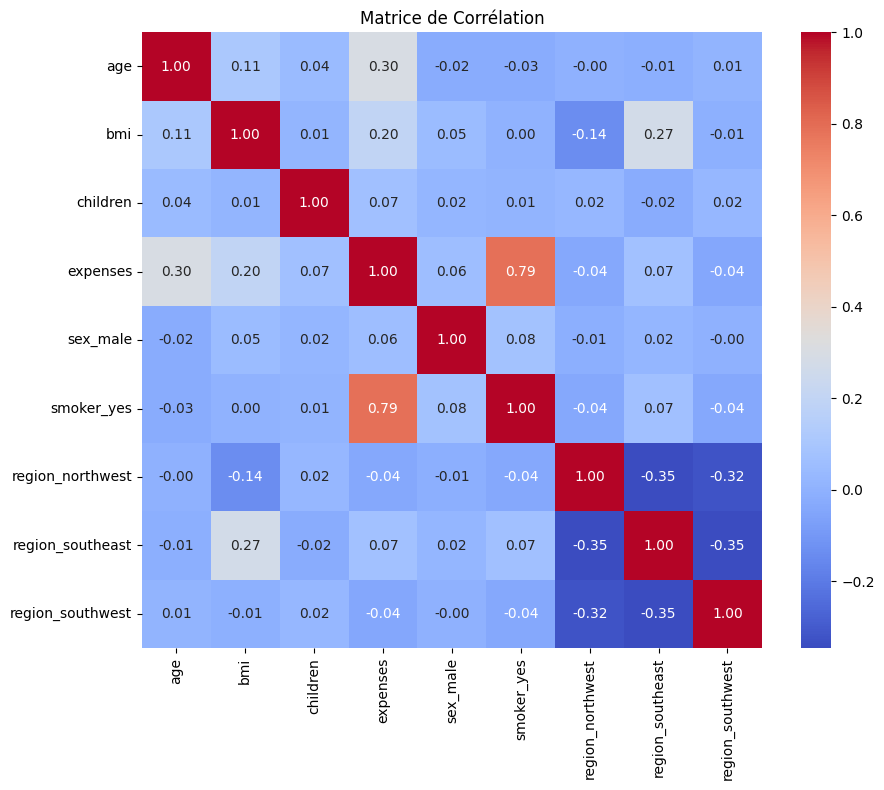

In [45]:
# Matrice de corrélation
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()


À partir de la matrice de corrélation affichée :

- La variable `smoker_yes` a une forte corrélation positive avec les `expenses` (0.79), indiquant que le fait de fumer augmente significativement les frais médicaux.
- Les variables `age` (0.30) et `bmi` (0.20) ont également une corrélation positive modérée avec les `expenses`, suggérant que l'âge et l'indice de masse corporelle influencent aussi les frais médicaux, mais de façon moins prononcée.

Ces observations montrent que le fait de fumer est de loin le facteur le plus influent dans la prédiction des frais médicaux.

#Interprétation des Résultats et Analyse des Facteurs Influents

#### 1. Analyse des Coefficients (pour la Régression Linéaire)

Pour la **régression linéaire**, les coefficients les plus élevés indiquent les caractéristiques ayant le plus d'impact sur la prédiction des frais médicaux.

- **smoker_yes** a le coefficient le plus élevé, ce qui signifie que le fait d'être fumeur augmente significativement les frais médicaux.
- **bmi** (indice de masse corporelle) et **age** suivent avec des coefficients relativement élevés, indiquant que plus l'âge et le BMI augmentent, plus les frais médicaux sont susceptibles d'être élevés.
- Les autres coefficients (régions géographiques et sexe) ont une influence moindre sur la prédiction.

En conclusion, **le statut de fumeur**, suivi de **l'IMC** et de **l'âge**, sont les facteurs les plus influents dans la prédiction des frais médicaux selon le modèle de régression linéaire.

#### 2. Importance des Caractéristiques (pour les Modèles d’Arbres)

Pour les modèles de type arbre (**Random Forest** et **Decision Tree**), l'importance des caractéristiques est calculée différemment et indique également les variables les plus influentes.

- Dans les deux modèles, **smoker_yes** est la caractéristique la plus importante, confirmant que le fait d'être fumeur est le facteur dominant dans les frais médicaux.
- **bmi** et **age** sont également importants dans ces modèles, même si leur importance est moindre par rapport à **smoker_yes**.
- Les autres caractéristiques, comme le sexe et les régions géographiques, ont une importance très faible, ce qui signifie qu'elles n'ajoutent pas beaucoup d'information utile pour ces modèles.

Ainsi, **smoker_yes**, **bmi**, et **age** sont les caractéristiques clés influençant la prédiction des frais médicaux dans les modèles d’arbre.

#### 3. Questions d'Interprétation

- **Quelles caractéristiques influencent le plus les frais médicaux ?**
  - Les caractéristiques les plus influentes dans la prédiction des frais médicaux sont **le statut de fumeur (smoker_yes)**, **l'IMC (bmi)**, et **l'âge (age)**. Ces caractéristiques apparaissent comme les plus importantes à la fois dans les modèles de régression linéaire et les modèles de type arbre.

- **Quels insights business pouvez-vous tirer sur la relation entre les caractéristiques et les frais médicaux ?**
  - Les fumeurs représentent des coûts médicaux nettement plus élevés que les non-fumeurs, ce qui peut justifier une augmentation des primes d'assurance pour les clients fumeurs. L'IMC, un indicateur de la corpulence, et l'âge sont également associés à des frais médicaux plus élevés, ce qui signifie que des clients plus âgés et/ou en surpoids présentent un risque accru de dépenses médicales. Ces insights pourraient être utilisés par les assureurs pour ajuster les primes et personnaliser les offres en fonction du profil de santé des clients.

- **Le modèle est-il capable de capturer les variations importantes de coûts entre les clients ?**
  - Oui, en particulier le **modèle Random Forest Regressor** avec un R² de **0.865** et un MAE plus bas que les autres modèles, ce qui indique une meilleure capacité à capturer la variabilité des coûts médicaux entre les clients. Ce modèle a également le MSE le plus bas, renforçant l'idée qu'il est plus précis pour prédire les frais médicaux.

En résumé, le **Random Forest Regressor** est le modèle le plus performant pour cette tâche de prédiction, et les principales caractéristiques influençant les frais médicaux sont le **statut de fumeur**, l'**IMC**, et l'**âge**.